In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def rule4(Q, A, errA, expA, B, errB, expB, C, errC, expC):
    """
    Q: The function that calculates the value that needs it's error determined.
    A: The function that calculates the value for A
    errA: The error in quantity A
    expA: The power (exponent) of quantity A
    ...and so on and so forth.
    """
    errQ = np.abs(Q) * np.sqrt((expA*(errA/A))**2+(expB*(errB/B))**2+(expC*(errC/C))**2)
    return errQ

# Plotting Code a variation of Jaylene Naylor's Code. Thanks Jaylene!

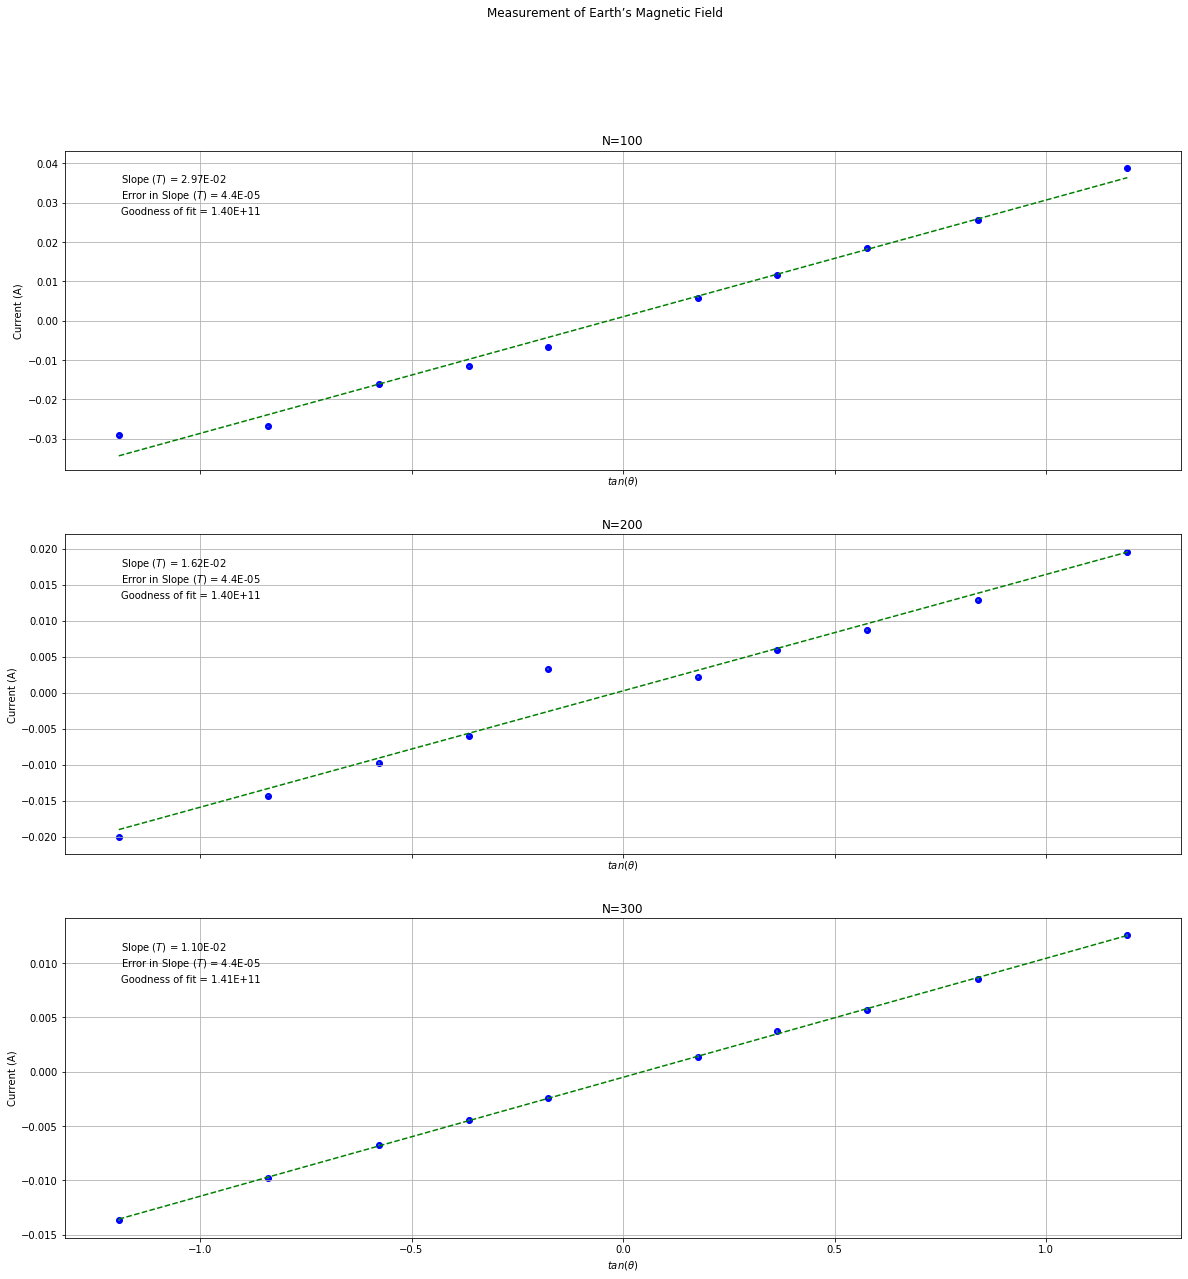

In [6]:
# N = 100
# Data
radians = (np.pi/180)*np.array([-50.,-40.,-30.,-20.,-10.,10.,20.,30.,40.,50.])
angle = np.tan(radians)
current100 = 10**-3*np.array([-29.1,-26.8,-16,-11.6,-6.7,5.8,11.6,18.4,25.7,38.8])
current200 = 10**-3*np.array([-19.97,-14.27,-9.74,-5.97,3.3,2.16,5.96,8.71,12.88,19.56])
current300 = 10**-3*np.array([-13.68,-9.74,-6.74,-4.45,-2.4,1.4,3.71,5.73,8.56,12.55])

err_angle = 1 # Degree

dy = 10**-3*np.array([.1,.1,.1,.1,.1,.1,.1,.1,.1,.1])

def getFit(x,y,dy):
    b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
    fit = b+m*x
    return fit

def getM(x,y,dy):
    b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
    return m

m1= getM(angle,current100,dy)
m2= getM(angle,current200,dy)
m3= getM(angle,current300,dy)

def get_dm(x,dy):
    def Delta(x, dy):
        D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
        return D
    D=Delta(x, dy)
    dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
    return dm

#Calculate the \"goodness of fit\" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
N1 = LLSFD2(angle,current100,dy)
N2 = LLSFD2(angle,current200,dy)
N3 = LLSFD2(angle,current300,dy)

fig, axs = plt.subplots(3,sharex=True,figsize=[20,20])
fig.suptitle('Measurement of Earth’s Magnetic Field')

axs[0].set_title('N=100')
axs[1].set_title('N=200')
axs[2].set_title('N=300')

axs[0].plot(x, getFit(x,current100,dy), color='green', linestyle='--')
axs[1].plot(x, getFit(x,current200,dy), color='green', linestyle='--')
axs[2].plot(x, getFit(x,current300,dy), color='green', linestyle='--')

axs[0].scatter(x, current100, color='blue', marker='o')
axs[1].scatter(x, current200, color='blue', marker='o')
axs[2].scatter(x, current300, color='blue', marker='o')

axs[0].errorbar(x, current100, yerr=dy, xerr=None, fmt="none")
axs[0].annotate('Slope ($T$) = {value:.{digits}E}'.format(value=m1, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
axs[0].annotate('Error in Slope ($T$) = {value:.{digits}E}'.format(value=get_dm(x,dy), digits=1),
             (0.05, 0.85), xycoords='axes fraction')
axs[0].annotate('Goodness of fit = {value:.{digits}E}'.format(value=N1, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

axs[1].errorbar(x, current200, yerr=dy, xerr=None, fmt="none")
axs[1].annotate('Slope ($T$) = {value:.{digits}E}'.format(value=m2, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
axs[1].annotate('Error in Slope ($T$) = {value:.{digits}E}'.format(value=get_dm(x,dy), digits=1),
             (0.05, 0.85), xycoords='axes fraction')
axs[1].annotate('Goodness of fit = {value:.{digits}E}'.format(value=N2, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

axs[2].errorbar(x, current300, yerr=dy, xerr=None, fmt="none")
axs[2].annotate('Slope ($T$) = {value:.{digits}E}'.format(value=m3, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
axs[2].annotate('Error in Slope ($T$) = {value:.{digits}E}'.format(value=get_dm(x,dy), digits=1),
             (0.05, 0.85), xycoords='axes fraction')
axs[2].annotate('Goodness of fit = {value:.{digits}E}'.format(value=N3, digits=2),
             (0.05, 0.80), xycoords='axes fraction')
axs[0].grid()
axs[1].grid()
axs[2].grid()

for ax in axs.flat:
    ax.set(xlabel='$tan(\\theta)$', ylabel='Current (A)')

In [11]:
r = 0.109 #m
err_r = 1e-3 #m
errN = 1 # turn

def calcB(slope,N,r):
    B = slope*((4e-7*np.pi*N)/(2*r))
    return B

B100 = calcB(2.97e-2,100,r)
errB100 = rule4(B100, 2.97e1, 9.5e-7, 1, 100, errN, 1, r, err_r, 1)
print('Magnetic Field for N=100: {value:.{digits}E}'.format(value=B100, digits=5),
      '+/- {value:.{digits}E}'.format(value=errB100, digits=3),'T')

B200 = calcB(1.62e-2,200,r)
errB200 = rule4(B200, 2.97e1, 9.5e-7, 1, 100, errN, 1, r, err_r, 1)
print('Magnetic Field for N=200: {value:.{digits}E}'.format(value=B200, digits=5),
      '+/- {value:.{digits}E}'.format(value=errB200, digits=3),'T')

B300 = calcB(1.1e-2,300,r)
errB300 = rule4(B300, 2.97e1, 9.5e-7, 1, 100, errN, 1, r, err_r, 1)
print('Magnetic Field for N=300: {value:.{digits}E}'.format(value=B300, digits=5),
      '+/- {value:.{digits}E}'.format(value=errB300, digits=3),'T')

print("Actual Northward Magnetic Field:",18428.5e-9,'T')

Magnetic Field for N=100: 1.71202E-05 +/- 2.323E-07 T
Magnetic Field for N=200: 1.86766E-05 +/- 2.535E-07 T
Magnetic Field for N=300: 1.90225E-05 +/- 2.582E-07 T
Actual Northward Magnetic Field: 1.84285e-05 T


Measurement of Earth’s Magnetic Field

Measurements

1)     Write down your measurement of the diameter of the coil including the uncertainty.  (2 points)

d = 2r = 2(.109m) = .218m

2)     Submit the Github link of your plots of tan(ϴ) vs. I with the appropriate fit parameters.  (7 points)

Shoutout to Landon for the code template above:)

3)     What is the value for the horizontal component of Earth’s magnetic field that you found for 100 turns of wire using the slope of your curve, including the uncertainty?  Show your work.  (6 points)

B_x100 = (1.712 ± .023) * 10^-5 Telsa
Code + equation above

4)     What is the theoretical value of the horizontal component of Earth’s magnetic field and the three values you found using your plots including the uncertainty?  Do your experimental values agree with the accepted value?  Discuss the results for all three number of turns of wire.  Justify your answers.  (7 points)

B_x100 = (1.712 ± .023) * 10^-5 Telsa

B_x200 = (1.867 ± .025) * 10^-5 Telsa

B_x300 = (1.902 ± .026) * 10^-5 Telsa

The theoretical value for N=100 and N=300 fall outside of the range of uncertainty of the experimental values measured.  The theoretical value for N=200 however is within the range of uncertainty measured with the experimental value.

5)     Briefly explain why your slope was highest for N = 300 loops and lowest for N = 100.  (3 points)

The magnetic field through the solenoid is greater when more loops are added to the solenoid. 